# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Very good service on this rout...
1,✅ Trip Verified | Flight mainly let down by ...
2,✅ Trip Verified | Another awful experience b...
3,"✅ Trip Verified | The service was rude, full..."
4,✅ Trip Verified | This flight was a joke. Th...


In [6]:
df.to_csv("BA_reviews.csv")

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Analysis

The CSV file was exported to Excel and cleaned there,
- Checked for duplicates 
- Removed unnecessary text from each rows. 
- Ensured the text was encoded properly (because i ran into encoding issues).
- Trimmed excess whitespaces from the text.

In [43]:
import pandas as pd

ba_reviews_raw = pd.read_csv(r"C:\Users\jolis\Documents\Cert\British Airways\BA_reviews.csv")
ba_reviews_raw = ba_reviews_raw.drop('Unnamed: 0', axis=1)
ba_reviews_raw.head()

,reviews
0,Not Verified | Very good service on this rout...
1,✅ Trip Verified | Flight mainly let down by ...
2,✅ Trip Verified | Another awful experience b...
3,"✅ Trip Verified | The service was rude, full..."
4,✅ Trip Verified | This flight was a joke. Th...


# Word Cloud Analysis

In [2]:
!pip install wordcloud
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [44]:
# remove special characters and convert all words to lower case
def remove_spec_char(text):
    return re.sub(r'[^A-Za-z\s]', '', text)
ba_reviews_raw['cleaned_text'] = ba_reviews_raw['reviews'].apply(remove_spec_char)
ba_reviews_raw['cleaned_text'] = ba_reviews_raw['cleaned_text'].apply(lambda x: x.lower())

In [45]:
tokenizer = TreebankWordTokenizer()
ba_reviews_raw['tokenized_text'] = ba_reviews_raw['cleaned_text'].apply(tokenizer.tokenize)

Tokenization: This is the process of breaking down text into smaller units called tokens. It could be words or phrases. This allows the program easily analyze the components to identifiy patterns and/or sentiment expressed within the text.

In [46]:
stop_words = set(stopwords.words('english'))
new_words = ["flight", "airline", "plane", "seat", "passenger", "airport", "crew", "boarding", "luggage", "baggage", "class", "cabin","ba","british","airways","service","food",'london', 'heathrow','new', 'york', 'jfk','via']
new_stopwords = stop_words.union(new_words)
ba_reviews_raw['no_stopword'] = ba_reviews_raw['tokenized_text'].apply(lambda x: [word for word in x if word not in new_stopwords])

Stopwords are common or frequently used words that we remove from the text data before analysis. In addition to the common english stopwords. I added some common words used when refering to flight (flight stopwords if you wish) which i think are not need for my analysis.

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [47]:
# Lammatization

lemmatizer = WordNetLemmatizer()
ba_reviews_raw['cleaned_review'] = ba_reviews_raw['no_stopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

Lemmatization is a text preprocessing technique that converts words to their base or dictionary form. For example; "Running", "Ran", "Runs", will all be converted to "RUN"

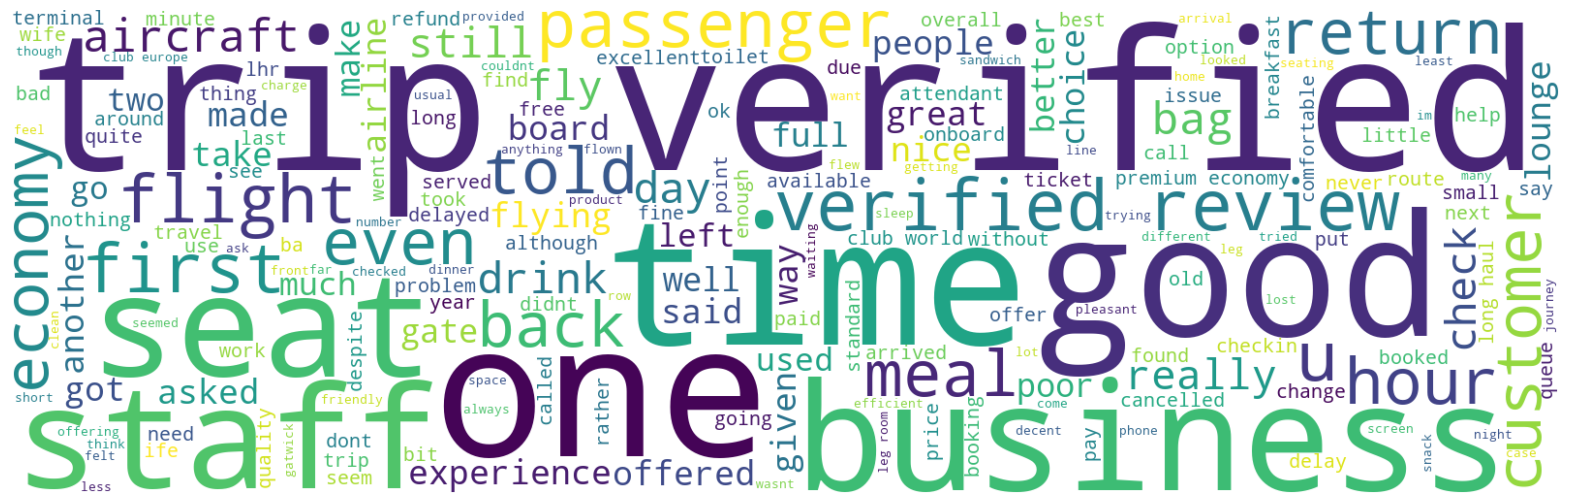

In [29]:
all_words = ' '.join([' '.join(words) for words in ba_reviews_raw['cleaned_review']])

wordcloud = WordCloud(width=1600, height=500, background_color='white').generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
ba_reviews_raw.to_parquet('BA_reviews_cleaned.parquet')

# Topic Modelling 

Topic modeling is a great way to uncover hidden themes in your airline reviews. Here’s how you can approach it:

- Load the Data – Read the CSV file into a Pandas DataFrame.

- Preprocess the Text – Clean the reviews by removing stopwords, punctuation, and special characters.

- Tokenization & Vectorization – Convert text into a format suitable for modeling (TF-IDF or Count Vectorizer).

- Apply Topic Modeling Algorithm – Use Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF).

- Analyze and Interpret Topics – Extract keywords and assign meaningful labels to topics.

In [55]:
import pandas as pd

ba_reviews = pd.read_parquet(r"C:\Users\jolis\Documents\Cert\British Airways\BA_reviews_cleaned.parquet")
ba_reviews.head()

,reviews,cleaned_text,tokenized_text,no_stopword,cleaned_review
0,Not Verified | Very good service on this rout...,not verified very good service on this route...,"[not, verified, very, good, service, on, this,...","[verified, good, route, th, march, worked, har...","[verified, good, route, th, march, worked, har..."
1,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a ...,"[trip, verified, flight, mainly, let, down, by...","[trip, verified, mainly, let, disagreeable, at...","[trip, verified, mainly, let, disagreeable, at..."
2,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by ...,"[trip, verified, another, awful, experience, b...","[trip, verified, another, awful, experience, d...","[trip, verified, another, awful, experience, d..."
3,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of...,"[trip, verified, the, service, was, rude, full...","[trip, verified, rude, full, attitude, poorly,...","[trip, verified, rude, full, attitude, poorly,..."
4,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there...,"[trip, verified, this, flight, was, a, joke, t...","[trip, verified, joke, four, people, business,...","[trip, verified, joke, four, people, business,..."


In [12]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np


### Using LDA via Gensim to uncover underlying themes and coherence score to find the optimal number of topics

In [57]:
# Step 1: Run coherence analysis to find optimal number of topics
print("Starting coherence analysis to find optimal number of topics...")

# Use your cleaned review text
cleaned_texts = ba_reviews['cleaned_review'].tolist()

# Tokenize the texts properly
tokenized_texts = [text.split() if isinstance(text, str) else text for text in cleaned_texts]

# Create dictionary and corpus for gensim
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=2, no_above=0.9)  # Filter rare and common words
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Test different numbers of topics
topic_range = range(2, 12)  # Test 2 to 12 topics
coherence_scores = []
models = []

print("Testing different numbers of topics...")
for num_topics in topic_range:
    print(f"Testing {num_topics} topics...")
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True,
        chunksize=100,
        eval_every=None  # Don't evaluate perplexity during training
    )
    
    # Calculate coherence
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=tokenized_texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    models.append(lda_model)
    print(f"Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")
    
optimal_idx = np.argmax(coherence_scores)
optimal_topics = list(topic_range)[optimal_idx]
optimal_score = coherence_scores[optimal_idx]
best_model = models[optimal_idx]

print(f"\nOptimal number of topics: {optimal_topics}")
print(f"Best coherence score: {optimal_score:.4f}")

Starting coherence analysis to find optimal number of topics...
Testing different numbers of topics...
Testing 2 topics...
Topics: 2, Coherence Score: 0.3669
Testing 3 topics...
Topics: 3, Coherence Score: 0.4228
Testing 4 topics...
Topics: 4, Coherence Score: 0.4511
Testing 5 topics...
Topics: 5, Coherence Score: 0.4161
Testing 6 topics...
Topics: 6, Coherence Score: 0.4453
Testing 7 topics...
Topics: 7, Coherence Score: 0.4772
Testing 8 topics...
Topics: 8, Coherence Score: 0.4332
Testing 9 topics...
Topics: 9, Coherence Score: 0.4532
Testing 10 topics...
Topics: 10, Coherence Score: 0.4663
Testing 11 topics...
Topics: 11, Coherence Score: 0.4167

Optimal number of topics: 7
Best coherence score: 0.4772


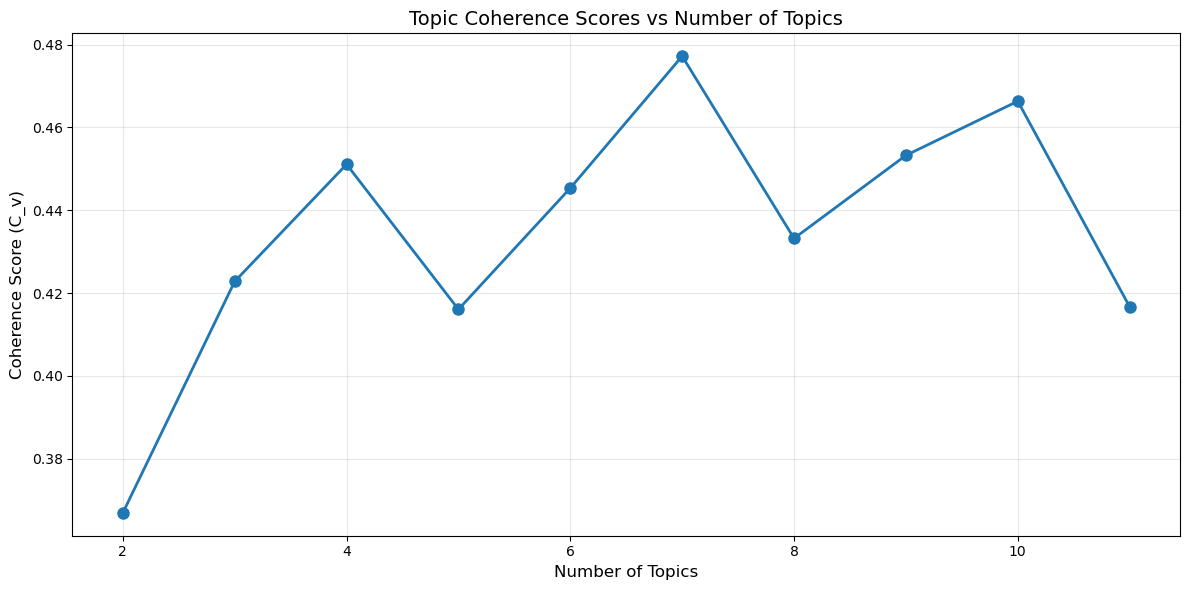

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Topics', fontsize=12)
plt.ylabel('Coherence Score (C_v)', fontsize=12)
plt.title('Topic Coherence Scores vs Number of Topics', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
def get_document_topics_robust(lda_model, corpus, num_topics):
 
    topic_assignments = []
    topic_probabilities = []
    
    for i, doc in enumerate(corpus):
        # Get topic probabilities for this document
        doc_topics = lda_model.get_document_topics(doc, minimum_probability=0.0)
        
        # Convert to list of tuples if not already
        if isinstance(doc_topics, list):
            topic_probs = doc_topics
        else:
            topic_probs = list(doc_topics)
        
        # Ensure we have probabilities for all topics
        topic_dict = {topic_id: prob for topic_id, prob in topic_probs}
        
        # Fill missing topics with 0 probability
        for topic_id in range(num_topics):
            if topic_id not in topic_dict:
                topic_dict[topic_id] = 0.0
        
        # Find dominant topic
        dominant_topic_id = max(topic_dict.keys(), key=lambda k: topic_dict[k])
        dominant_prob = topic_dict[dominant_topic_id]
        
        # Store results (1-indexed for topics)
        topic_assignments.append(dominant_topic_id + 1)
        topic_probabilities.append(dominant_prob)
    
    return topic_assignments, topic_probabilities

### Assign Topics to Each Review

In [60]:
print("Assigning topics using the optimal model...")
topic_assignments, topic_probabilities = get_document_topics_robust(best_model, corpus, optimal_topics)

# Add to dataframe
ba_reviews['optimal_topic'] = topic_assignments
ba_reviews['topic_probability'] = topic_probabilities

# Step 6 (Fixed): Display results
print("Sample results with optimal topic assignments:")
print(ba_reviews[['reviews', 'optimal_topic', 'topic_probability']].head(10))

# Step 7 (Fixed): Topic distribution
print(f"\nTopic distribution (using {optimal_topics} topics):")

Assigning topics using the optimal model...
Sample results with optimal topic assignments:
                                             reviews  optimal_topic  \
0  Not Verified |  Very good service on this rout...              5   
1  ✅ Trip Verified |   Flight mainly let down by ...              4   
2  ✅ Trip Verified |   Another awful experience b...              6   
3  ✅ Trip Verified |   The service was rude, full...              6   
4  ✅ Trip Verified |   This flight was a joke. Th...              6   
5  ✅ Trip Verified |   This time British Airways ...              4   
6  ✅ Trip Verified |   The seats were excellent, ...              3   
7  ✅ Trip Verified |   After the nightmare of get...              6   
8  ✅ Trip Verified |   Prior to boarding a gate a...              3   
9  ✅ Trip Verified |   I flew from Amsterdam to L...              6   

   topic_probability  
0           0.480682  
1           0.190285  
2           0.320548  
3           0.353190  
4           

### Display Topics with Keywords

In [61]:
# Display topics from optimal model (same format as original)
print(f"Topics from Optimal Model ({optimal_topics} topics):")
for topic_idx in range(best_model.num_topics):
    print(f"Topic {topic_idx + 1}:")
    topic_words = best_model.show_topic(topic_idx, topn=10)
    top_words = [word for word, prob in topic_words]
    print(", ".join(top_words))
    print("\n")

Topics from Optimal Model (7 topics):
Topic 1:
customer, call, ticket, bag, booking, agent, refund, phone, booked, told


Topic 2:
town, cape, dublin, refreshment, standing, reservation, strike, m, frankfurt, venice


Topic 3:
seat, economy, business, one, passenger, leg, airline, premium, flight, return


Topic 4:
good, meal, drink, first, club, time, comfortable, lounge, served, choice


Topic 5:
review, year, staff, many, journey, dont, flying, would, really, didnt


Topic 6:
hour, time, u, would, get, could, day, back, one, got


Topic 7:
check, bag, terminal, minute, gate, lounge, departure, late, security, queue




### Visualize Topics with pyLDAvis

In [62]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare visualization using pyLDAvis
pyLDAvis.enable_notebook()

print(f"Creating interactive visualization for {optimal_topics} topics...")

# Generate the visualization
vis = gensimvis.prepare(
    topic_model=best_model,    # Your optimal Gensim LDA model
    corpus=corpus,             # Your document corpus
    dictionary=dictionary,     # Your word dictionary
    sort_topics=False
)

vis  # This will display the visualization in Jupyter Notebook

Creating interactive visualization for 7 topics...


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.262489  0.140122       1        1   6.702471
1      0.120527 -0.092980       2        1   0.974973
2     -0.186142  0.082575       3        1  29.574048
3     -0.250544 -0.182594       4        1  19.923068
4     -0.083688  0.189541       5        1  11.132326
5     -0.009883  0.127075       6        1  24.406502
6      0.147241 -0.263738       7        1   7.286613, topic_info=        Term         Freq        Total Category  logprob  loglift
8       good  1516.000000  1516.000000  Default  30.0000  30.0000
187     seat  1915.000000  1915.000000  Default  29.0000  29.0000
72      hour  1613.000000  1613.000000  Default  28.0000  28.0000
49     check   836.000000   836.000000  Default  27.0000  27.0000
489   review   921.000000   921.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
114     took   125.959695   400.974719   Topic7  -4.8584   1.4612
2517  budget    99.751953   141.126808   Topic7  -5.0917   2.2722
194     time   112.836686  2044.722495   Topic7  -4.9684  -0.2779
143     full   105.221520   449.642088   Topic7  -5.0383   1.1667
378   ground   100.625155   246.554882   Topic7  -5.0829   1.7229

[400 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
4765      2  0.936324      aberdeen
2400      2  0.968506  additionally
1722      1  0.984083       advised
720       7  0.986394           age
33        1  0.996174         agent
...     ...       ...           ...
32        5  0.166317         would
32        6  0.578843         would
507       3  0.132366          year
507       5  0.834063          year
507       6  0.033490          year

[586 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7])

## Insights from analysis

For this analysis, I used Latent Dirichlet Allocation (LDA) via Gensim to uncover underlying themes in the customer review dataset. I used the data set above for the Topic modelling section which has already been cleaned, tokenized and the stop-words removed.

To identify the most meaningful number of topics, I calculated the coherence score for a range of topic counts. Based on this evaluation, the optimal number of topics was 7

The LDA model generated 7 distinct topics, each represented by the top keywords associated with it. I went ahend to name what i think the keywords talk about:

Topic 1 – Booking & Customer Service:

+ customer, call, ticket, bag, booking, agent, refund, phone, booked, told

Topic 2 – Airport Locations & Logistics:

+ town, cape, dublin, refreshment, standing, reservation, strike, m, frankfurt, venice

Topic 3 – Seating & Cabin Experience:

+ seat, economy, business, one, passenger, leg, airline, premium, flight, return

Topic 4 – In-Flight Experience (Food & Comfort):

+ good, meal, drink, first, club, time, comfortable, lounge, served, choice

Topic 5 – General Experience & Staff Attitudes:

+ review, year, staff, many, journey, dont, flying, would, really, didnt

Topic 6 – Delays & Time-Related Issues:

+ hour, time, u, would, get, could, day, back, one, got

Topic 7 – Check-In & Departure Logistics:

+ check, bag, terminal, minute, gate, lounge, departure, late, security, queue

The topic modeling process helped reveal key areas of concern and satisfaction among reviewers. Topics covered a wide range of experiences, including customer service interactions, seat quality, food and comfort, time-related issues, and airport logistics. This granularity can help guide targeted improvements in service delivery and customer engagement strategies.

In [97]:
ba_reviews.to_parquet('BA_reviews_TM.parquet')

# Sentiment Analysis

In [98]:
import pandas as pd

ba_reviews_TM = pd.read_parquet(r"C:\Users\jolis\Documents\Cert\British Airways\BA_reviews_TM.parquet")

In [99]:
ba_reviews_TM.head()

,reviews,cleaned_text,tokenized_text,no_stopword,cleaned_review,optimal_topic,topic_probability
0,Not Verified | Very good service on this rout...,not verified very good service on this route...,"[not, verified, very, good, service, on, this,...","[verified, good, route, th, march, worked, har...","[verified, good, route, th, march, worked, har...",5,0.480682
1,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a ...,"[trip, verified, flight, mainly, let, down, by...","[trip, verified, mainly, let, disagreeable, at...","[trip, verified, mainly, let, disagreeable, at...",4,0.190285
2,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by ...,"[trip, verified, another, awful, experience, b...","[trip, verified, another, awful, experience, d...","[trip, verified, another, awful, experience, d...",6,0.320548
3,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of...,"[trip, verified, the, service, was, rude, full...","[trip, verified, rude, full, attitude, poorly,...","[trip, verified, rude, full, attitude, poorly,...",6,0.353190
4,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there...,"[trip, verified, this, flight, was, a, joke, t...","[trip, verified, joke, four, people, business,...","[trip, verified, joke, four, people, business,...",6,0.437825


In [117]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Copy original DataFrame
ba_reviews_vader = ba_reviews_TM.copy()

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Updated sentiment function
def get_vader_sentiment(text):
    if isinstance(text, (list, np.ndarray)):
        text = ' '.join(map(str, text))  # join array elements into a string
    elif text is None:
        return 0
    elif isinstance(text, float) and np.isnan(text):
        return 0
    return analyzer.polarity_scores(str(text))['compound']

# Apply to get sentiment scores
ba_reviews_vader["Sentiment Score"] = ba_reviews_vader["cleaned_review"].apply(get_vader_sentiment)

# Categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

ba_reviews_vader["Sentiment Category"] = ba_reviews_vader["Sentiment Score"].apply(categorize_sentiment)
ba_reviews_vader = ba_reviews_vader.drop(columns=['optimal_topic','topic_probability'], axis=1)
ba_reviews_vader.head()

,reviews,cleaned_text,tokenized_text,no_stopword,cleaned_review,Sentiment Score,Sentiment Category
0,Not Verified | Very good service on this rout...,not verified very good service on this route...,"[not, verified, very, good, service, on, this,...","[verified, good, route, th, march, worked, har...","[verified, good, route, th, march, worked, har...",-0.7579,Negative
1,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a ...,"[trip, verified, flight, mainly, let, down, by...","[trip, verified, mainly, let, disagreeable, at...","[trip, verified, mainly, let, disagreeable, at...",0.8225,Positive
2,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by ...,"[trip, verified, another, awful, experience, b...","[trip, verified, another, awful, experience, d...","[trip, verified, another, awful, experience, d...",-0.8126,Negative
3,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of...,"[trip, verified, the, service, was, rude, full...","[trip, verified, rude, full, attitude, poorly,...","[trip, verified, rude, full, attitude, poorly,...",-0.4588,Negative
4,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there...,"[trip, verified, this, flight, was, a, joke, t...","[trip, verified, joke, four, people, business,...","[trip, verified, joke, four, people, business,...",0.0000,Neutral


In [118]:
# Display sentiment distribution
ba_reviews_vader["Sentiment Category"].value_counts()

Sentiment Category
Positive    1831
Negative    1111
Neutral       58
Name: count, dtype: int64

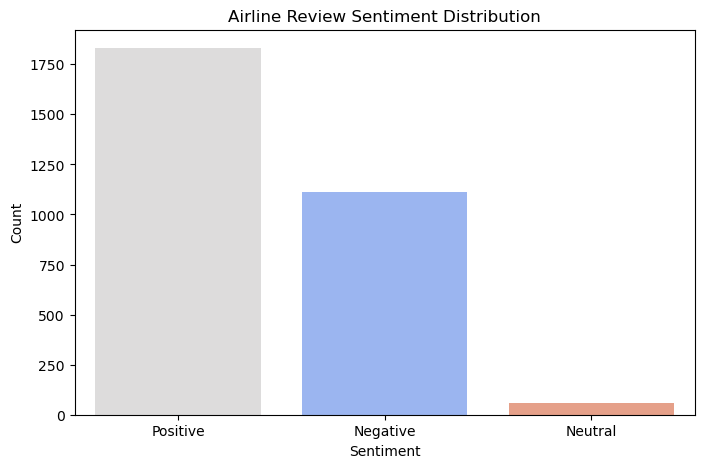

In [111]:
import seaborn as sns

# Plot sentiment distribution with updated syntax
plt.figure(figsize=(8, 5))
sns.countplot(data=ba_reviews_vader, x="Sentiment Category", hue="Sentiment Category", palette="coolwarm", legend=False, order=["Positive", "Negative", "Neutral"])
plt.title("Airline Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Sentiment Category', ylabel='review_length'>

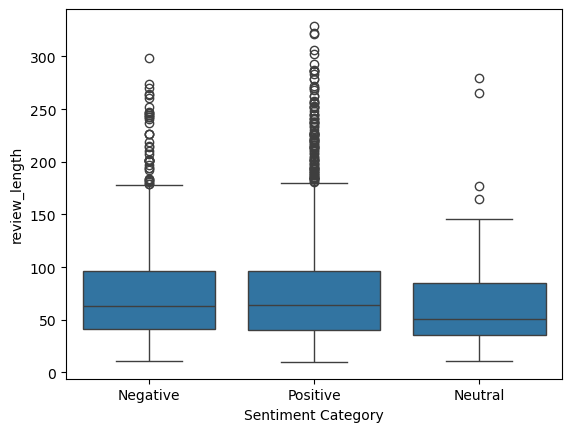

In [123]:
# Add review length
ba_reviews_vader["review_length"] = ba_reviews_vader["cleaned_review"].apply(len)

# Plot review length by sentiment
import seaborn as sns
sns.boxplot(x="Sentiment Category", y="review_length", data=ba_reviews_vader)


In [128]:
length_summary = ba_reviews_vader.groupby("Sentiment Category")["review_length"].describe()
print(length_summary)

                     count       mean        std   min   25%   50%    75%  \
Sentiment Category                                                          
Negative            1111.0  74.660666  46.767443  11.0  41.0  63.0  96.00   
Neutral               58.0  68.551724  54.225058  11.0  36.0  51.0  85.25   
Positive            1831.0  77.001638  52.474063  10.0  40.0  64.0  96.00   

                      max  
Sentiment Category         
Negative            299.0  
Neutral             280.0  
Positive            329.0  


## Insights from the analysis

I used the data set that was also used for Topic modelling section which was already cleaned, tokenized and the stop-words removed for this sentiment analysis. I droped the columns associated to topic modelling.

I used Vader Sentiment Analyzer because it is better for longer reviews because, VADER sentiment analysis has the ability to handle context, negation, and sentiment intensity effectively.

I used the data and seaborn to visualize the distrubution of sentimnets the results were; 
+ Positive: 1831
+ Negative: 1111
+ Neutral: 58

This results indicate **_most reviews express clear sentiment_**, with a strong positive bias. The low number of neutral reviews suggests that users tend to write with emotional polarity — either satisfaction or dissatisfaction — rather than leaving neutral feedback.

I also explored whether there was a relationship between review length and sentiment to answer questions like

_"Do angry people write longer rants?" or "Are short reviews more positive?"_

The results shows that **_positive and negative reviews tend to be longer than neutral ones_**, with positive reviews having the highest average length. There isn’t strong evidence that negative reviews are significantly longer than positive ones, so the idea that “angry people rant more” isn’t clearly supported. However, neutral reviews are generally shorter, suggesting that emotional expression (positive or negative) is often accompanied by more detailed writing.

#### Linking Sentiment to Topics (Qualitative Insight)

Although sentiment was not directly modeled per topic, some logical overlaps can be inferred:

Topic 1 (Customer Service) and Topic 6 (Delays) likely correlate with negative sentiment, given their focus on complaints (e.g., refund, time, got).

Topic 4 (Food & Comfort) and Topic 3 (Seating) may be tied to positive sentiment, reflecting satisfaction with comfort and in-flight experience.

Topic 5 shows more emotional language (“dont,” “really,” “didn’t”), which might align with mixed or polarized sentiment.